In [43]:
%matplotlib inline
from matplotlib import pyplot as plt

import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from mylibs import transform
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

### Regressão

In [3]:
X,y = sklearn.datasets.load_boston(return_X_y=True)
X = transform.standardize(X)
kfold = KFold(n_splits=5)

#### Random forest

In [13]:
n_estimators = 50
while n_estimators <=200:
    max_depth = 3
    while max_depth <= 7:
        
        erros_mse = np.empty((1,0),dtype = float)
        erros_mae = np.empty((1,0),dtype = float)

        for idx_train, idx_test in kfold.split(X):
            Xtrain = X[idx_train]
            Xtest = X[idx_test]
            y_train = y[idx_train]
            y_test = y[idx_test]
            modelo = RandomForestRegressor(n_estimators=n_estimators,random_state=0,max_depth=max_depth)
            modelo.fit(Xtrain,y_train)
            y_pred = modelo.predict(Xtest)
            erro_mse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
            erro_mae = metrics.mean_absolute_error(y_test,y_pred)
           
            erros_mse = np.append(erros_mse,erro_mse)
            erros_mae = np.append(erros_mae,erro_mae)


        print("N_estimators = ",n_estimators,"max_depth = ", max_depth)
        print(np.mean(erros_mse))
        print(np.mean(erros_mae))
        print("--------------------------------------------------------")
        max_depth = max_depth+2
        
    n_estimators = n_estimators*2



N_estimators =  50 max_depth =  3
4.939470308337301
3.4980499475350775
--------------------------------------------------------
N_estimators =  50 max_depth =  5
4.658906876804787
3.170800647565499
--------------------------------------------------------
N_estimators =  50 max_depth =  7
4.560030916750247
3.060189942478459
--------------------------------------------------------
N_estimators =  100 max_depth =  3
4.848333979791277
3.4461299024048295
--------------------------------------------------------
N_estimators =  100 max_depth =  5
4.547700501398064
3.1187912029145117
--------------------------------------------------------
N_estimators =  100 max_depth =  7
4.482635612069852
3.0387592768438765
--------------------------------------------------------
N_estimators =  200 max_depth =  3
4.8561956424520805
3.4388920717004496
--------------------------------------------------------
N_estimators =  200 max_depth =  5
4.558864037006464
3.1140975978254084
-----------------------------

#### Decision tree

In [14]:
max_depth = 3
erros_mse = np.empty((1,0),dtype = float)
erros_mae = np.empty((1,0),dtype = float)
for idx_train, idx_test in kfold.split(X):
    Xtrain = X[idx_train]
    Xtest = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    modelo = DecisionTreeRegressor(random_state=0)
    modelo.fit(Xtrain,y_train)
    y_pred = modelo.predict(Xtest)
    erro_mse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    erro_mae = metrics.mean_absolute_error(y_test,y_pred)

    erros_mse = np.append(erros_mse,erro_mse)
    erros_mae = np.append(erros_mae,erro_mae)

print(np.mean(erros_mse))
print(np.mean(erros_mae))

  

6.243197499249364
4.029419530188312


#### Gradient boosting

In [42]:
learning_rate= 0.1
n_estimators = 50
for i in range(3):
    if(i== 1):
        learning_rate = 0.05
    elif i==2:
        learning_rate = 0.01
    n_estimators = 50    
    while n_estimators <=200:
        max_depth = 3
        while max_depth <= 7:

            erros_mse = np.empty((1,0),dtype = float)
            erros_mae = np.empty((1,0),dtype = float)

            for idx_train, idx_test in kfold.split(X):
                Xtrain = X[idx_train]
                Xtest = X[idx_test]
                y_train = y[idx_train]
                y_test = y[idx_test]
                modelo = GradientBoostingRegressor(n_estimators=n_estimators,random_state=0,max_depth=max_depth,learning_rate=learning_rate)
                modelo.fit(Xtrain,y_train)
                y_pred = modelo.predict(Xtest)
                erro_mse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
                erro_mae = metrics.mean_absolute_error(y_test,y_pred)

                erros_mse = np.append(erros_mse,erro_mse)
                erros_mae = np.append(erros_mae,erro_mae)


            print("N_estimators = ",n_estimators,"max_depth = ", max_depth,"learning_rate = ",learning_rate)
            print(np.mean(erros_mse))
            print(np.mean(erros_mae))
            print("--------------------------------------------------------")
            max_depth = max_depth+2

        n_estimators = n_estimators*2

N_estimators =  50 max_depth =  3 learning_rate =  0.1
4.314535552562562
3.0486757025105606
--------------------------------------------------------
N_estimators =  50 max_depth =  5 learning_rate =  0.1
4.953127566613135
3.2615880398101056
--------------------------------------------------------
N_estimators =  50 max_depth =  7 learning_rate =  0.1
5.163897582602951
3.231976591855323
--------------------------------------------------------
N_estimators =  100 max_depth =  3 learning_rate =  0.1
4.2038052472633485
2.997886495720863
--------------------------------------------------------
N_estimators =  100 max_depth =  5 learning_rate =  0.1
4.906909323373277
3.2324907988535116
--------------------------------------------------------
N_estimators =  100 max_depth =  7 learning_rate =  0.1
5.135630251959995
3.2147393128601784
--------------------------------------------------------
N_estimators =  200 max_depth =  3 learning_rate =  0.1
4.185343447542792
2.987050114350948
------------

### Classificação

In [48]:
X,y = sklearn.datasets.load_breast_cancer(return_X_y=True)
kfold = sklearn.model_selection.StratifiedKFold(n_splits=5)

#### Random Forest

N_estimators =  50 max_depth =  3
0.9748435054773082
0.9544747979992305
0.9539720403505857
0.9641648225336794
0.9475546431041026


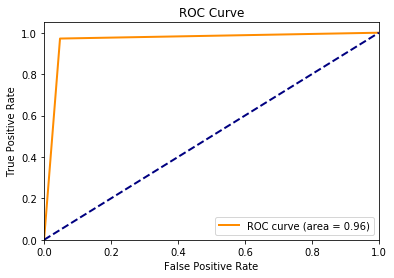

[[40  2]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  50 max_depth =  5
0.9775821596244132
0.9597537514428627
0.960485320406875
0.9685524450339887
0.9537412459251634


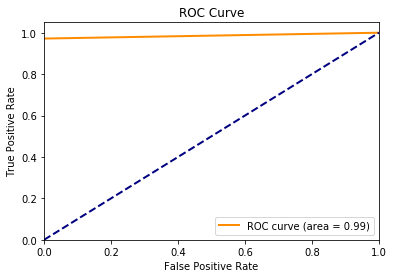

[[42  0]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  50 max_depth =  7
0.9776604068857591
0.9685109657560599
0.9730197114407642
0.9750276740586022
0.9654082765325807


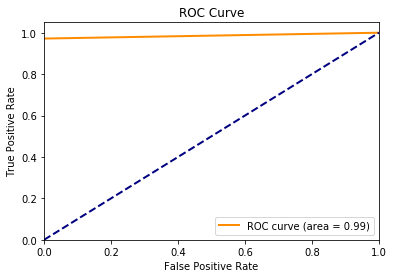

[[42  0]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  100 max_depth =  3
0.9720266040688577
0.9544440169295882
0.956481312115115
0.9640295059049194
0.9484717737952261


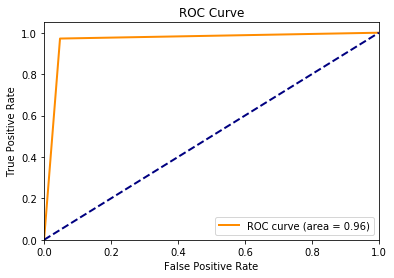

[[40  2]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  100 max_depth =  5
0.9804381846635369
0.9632320123124278
0.9621010487798672
0.9710265678862292
0.957384097868867


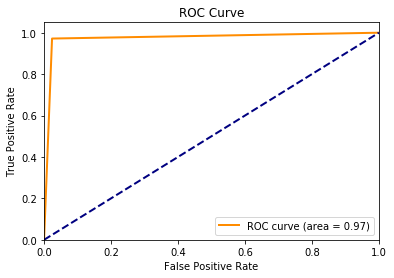

[[41  1]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  100 max_depth =  7
0.9748826291079812
0.9579838399384378
0.9590536931085486
0.9667154249252562
0.9522253677101368


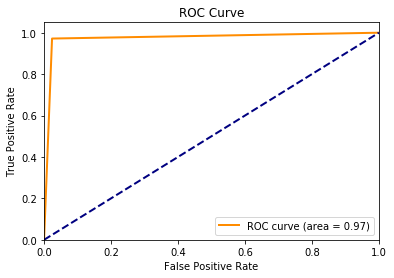

[[41  1]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  200 max_depth =  3
0.9748435054773082
0.956213928434013
0.9566345909969293
0.9654866559536188
0.9498802244994515


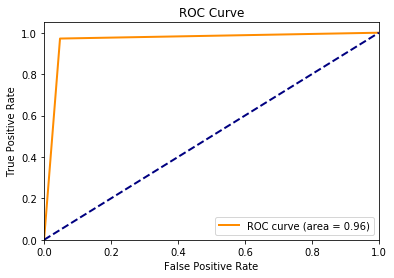

[[40  2]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  200 max_depth =  5
0.9748435054773082
0.9597229703732204
0.9618780132529536
0.9681729826920119
0.9545867582757527


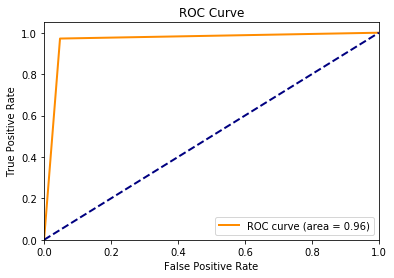

[[40  2]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  200 max_depth =  7
0.9776604068857591
0.9597537514428627
0.9595223209307717
0.9682827641426568
0.9536696275846293


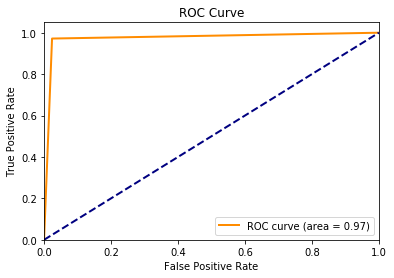

[[41  1]
 [ 2 69]]
--------------------------------------------------------


In [68]:
n_estimators = 50
while n_estimators <=200:
    max_depth = 3
    while max_depth <= 7:
        model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)
        recalls = np.empty((1,0),dtype = float)
        acuracias = np.empty((1,0),dtype = float)
        precisions = np.empty((1,0),dtype = float)
        f1s = np.empty((1,0),dtype = float)
        aucs = np.empty((1,0),dtype = float)
        fprs = np.empty((1,0),dtype = float)
        tprs = np.empty((1,0),dtype = float)
        for idx_train, idx_test in kfold.split(X,y):
            Xtrain = X[idx_train]
            Xtest = X[idx_test]
            y_train = y[idx_train]
            y_test = y[idx_test]
            model.fit(Xtrain,y_train)
            y_pred = model.predict(Xtest)
            acuracia = metrics.accuracy_score(y_test,y_pred)
            precision = metrics.precision_score(y_test,y_pred)
            recall = metrics.recall_score(y_test, y_pred)
            f1 = metrics.f1_score(y_test, y_pred)
            recalls = np.append(recalls,recall)
            acuracias = np.append(acuracias,acuracia)
            precisions = np.append(precisions,precision)
            f1s = np.append(f1s,f1)
            auc = metrics.roc_auc_score(y_test,y_pred)
            aucs = np.append(aucs,auc)
            

            fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)
            fprs = np.append(fprs,fpr[1])
            tprs = np.append(tprs,tpr[1])
            
        print("N_estimators = ",n_estimators,"max_depth = ", max_depth)
        print(np.mean(recalls))
        print(np.mean(acuracias))
        print(np.mean(precisions))
        print(np.mean(f1s))
        print(np.mean(aucs))
        
        roc = metrics.auc(fpr, tpr)
        plt.figure();
        plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % roc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
        print(metrics.confusion_matrix(y_test, y_pred, labels=np.unique(y_test)))
        
        
        print("--------------------------------------------------------")
        max_depth = max_depth + 2
    n_estimators = n_estimators*2


#### Decision tree

0.9300078247261346
0.9244786456329358
0.9491746599350643
0.939032794921433
0.9225897373907527


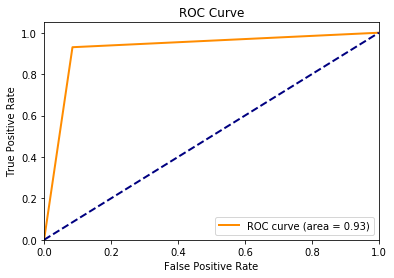

[[40  2]
 [ 8 63]]
--------------------------------------------------------


In [67]:
model = DecisionTreeClassifier()
recalls = np.empty((1,0),dtype = float)
acuracias = np.empty((1,0),dtype = float)
precisions = np.empty((1,0),dtype = float)
f1s = np.empty((1,0),dtype = float)
aucs = np.empty((1,0),dtype = float)
fprs = np.empty((1,0),dtype = float)
tprs = np.empty((1,0),dtype = float)
for idx_train, idx_test in kfold.split(X,y):
    Xtrain = X[idx_train]
    Xtest = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    model.fit(Xtrain,y_train)
    y_pred = model.predict(Xtest)
    acuracia = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    recalls = np.append(recalls,recall)
    acuracias = np.append(acuracias,acuracia)
    precisions = np.append(precisions,precision)
    f1s = np.append(f1s,f1)
    auc = metrics.roc_auc_score(y_test,y_pred)
    aucs = np.append(aucs,auc)
    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)
    fprs = np.append(fprs,fpr[1])
    tprs = np.append(tprs,tpr[1])
    

print(np.mean(recalls))
print(np.mean(acuracias))
print(np.mean(precisions))
print(np.mean(f1s))
print(np.mean(aucs))
  
plt.figure();
plt.plot([0,np.mean(fprs),1],[0,np.mean(tprs),1], color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print(metrics.confusion_matrix(y_test, y_pred, labels=np.unique(y_test)))
print("--------------------------------------------------------")


#### Gradient Boosting

N_estimators =  50 max_depth =  3 learning_rate =  0.1
0.9664319248826292
0.9579530588687957
0.9669594275543932
0.9664588771990632
0.9550875017547142


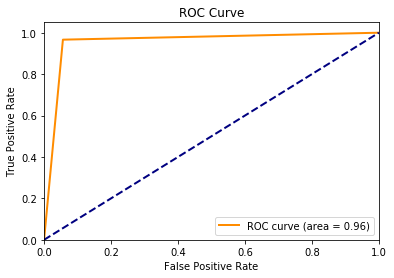

[[41  1]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  50 max_depth =  5 learning_rate =  0.1
0.94679186228482
0.9420238553289726
0.9608170601971183
0.9536005240073534
0.9403948237226979


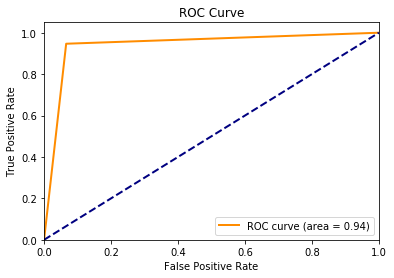

[[40  2]
 [ 4 67]]
--------------------------------------------------------
N_estimators =  50 max_depth =  7 learning_rate =  0.1
0.9300469483568076
0.9227395151981531
0.946476201298925
0.9376750700280112
0.9202283468251368


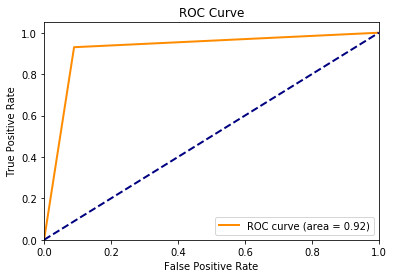

[[40  2]
 [ 8 63]]
--------------------------------------------------------
N_estimators =  100 max_depth =  3 learning_rate =  0.1
0.9721048513302033
0.9597845325125048
0.9644497393719039
0.9680919765426808
0.9555983835831526


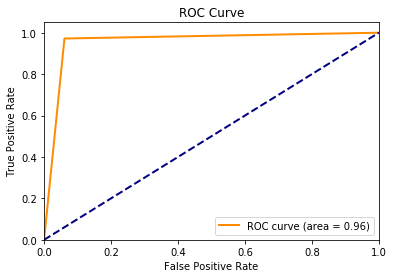

[[41  1]
 [ 1 70]]
--------------------------------------------------------
N_estimators =  100 max_depth =  5 learning_rate =  0.1
0.9608372456964005
0.9491342824163139
0.9587358986968078
0.9596660646361592
0.9451473050187429


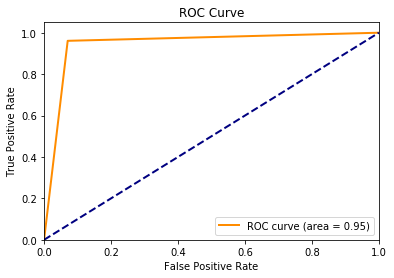

[[41  1]
 [ 1 70]]
--------------------------------------------------------
N_estimators =  100 max_depth =  7 learning_rate =  0.1
0.935641627543036
0.9262485571373607
0.9468145533496056
0.9405869474226473
0.9230256864182511


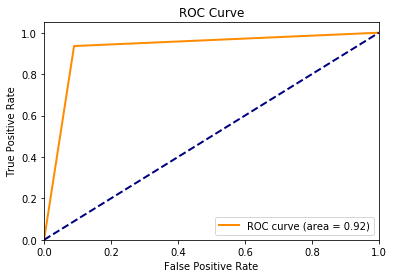

[[40  2]
 [ 8 63]]
--------------------------------------------------------
N_estimators =  200 max_depth =  3 learning_rate =  0.1
0.9804773082942099
0.9650019238168526
0.9647248144800873
0.9724056988141495
0.9597292410795524


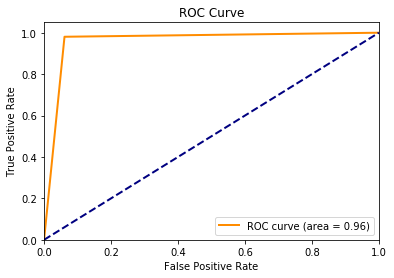

[[41  1]
 [ 1 70]]
--------------------------------------------------------
N_estimators =  200 max_depth =  5 learning_rate =  0.1
0.9608372456964005
0.9509041939207388
0.9613234177226829
0.9609869659570606
0.9475282573996953


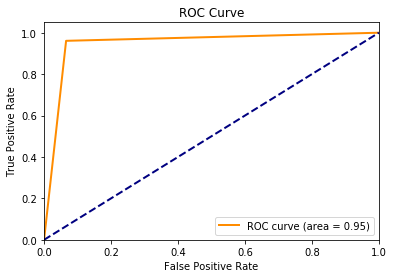

[[41  1]
 [ 1 70]]
--------------------------------------------------------
N_estimators =  200 max_depth =  7 learning_rate =  0.1
0.9327856025039123
0.9261869949980761
0.9492539790767027
0.9404519100462305
0.9239232552940381


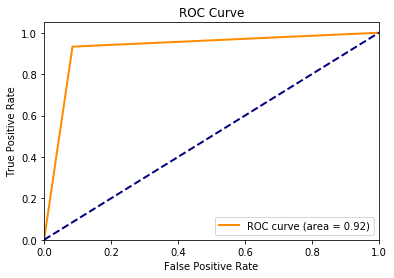

[[40  2]
 [ 8 63]]
--------------------------------------------------------
N_estimators =  50 max_depth =  3 learning_rate =  0.05
0.9692488262910798
0.9526741054251634
0.9563214641383656
0.9625138072061222
0.9470275139207336


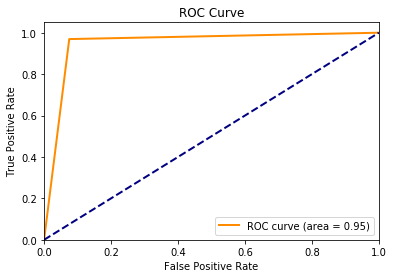

[[40  2]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  50 max_depth =  5 learning_rate =  0.05
0.9523865414710485
0.9402847248941899
0.9528209963660702
0.9524340297261455
0.9361600481441622


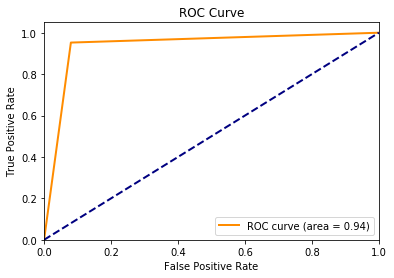

[[40  2]
 [ 5 66]]
--------------------------------------------------------
N_estimators =  50 max_depth =  7 learning_rate =  0.05
0.9328638497652582
0.92454020777222
0.9466664600508274
0.9391693229015745
0.9216921685149657


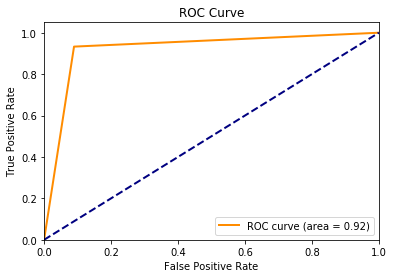

[[40  2]
 [ 8 63]]
--------------------------------------------------------
N_estimators =  100 max_depth =  3 learning_rate =  0.05
0.9720266040688577
0.9596921893035782
0.964344899808206
0.9680167559400404
0.9555038889668761


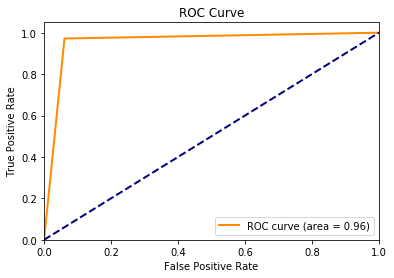

[[40  2]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  100 max_depth =  5 learning_rate =  0.05
0.9523474178403756
0.9455021161985379
0.9611498098265432
0.9565099538020696
0.9431726015004758


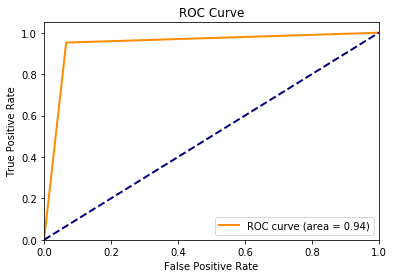

[[40  2]
 [ 5 66]]
--------------------------------------------------------
N_estimators =  100 max_depth =  7 learning_rate =  0.05
0.9300078247261346
0.9209696036937285
0.9439966669700756
0.9364084523230373
0.9178832036144515


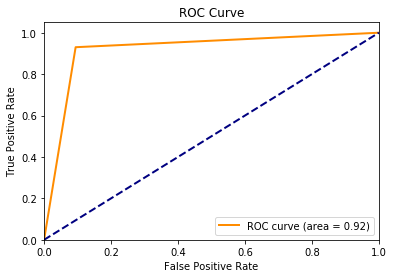

[[40  2]
 [ 8 63]]
--------------------------------------------------------
N_estimators =  200 max_depth =  3 learning_rate =  0.05
0.9721048513302033
0.9615236629472873
0.9669058797227811
0.9693789778296822
0.9579239649785014


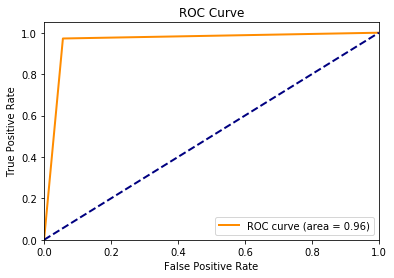

[[40  2]
 [ 1 70]]
--------------------------------------------------------
N_estimators =  200 max_depth =  5 learning_rate =  0.05
0.957942097026604
0.9596306271642939
0.9779673063255153
0.96757486957385
0.9602556553793044


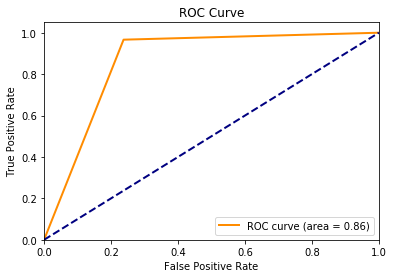

[[42  0]
 [ 3 68]]
--------------------------------------------------------
N_estimators =  200 max_depth =  7 learning_rate =  0.05
0.9328247261345852
0.9262177760677183
0.9492539790767026
0.940452847805789
0.9239428171093745


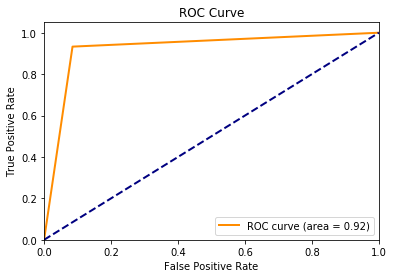

[[40  2]
 [ 8 63]]
--------------------------------------------------------
N_estimators =  50 max_depth =  3 learning_rate =  0.01
0.9776212832550861
0.9420546363986148
0.9335331893370826
0.9549244663382594
0.9298959129453724


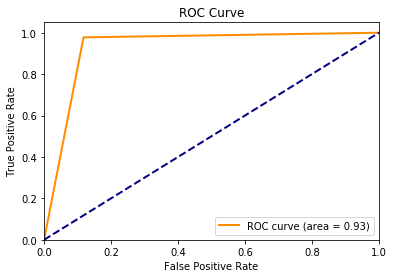

[[38  4]
 [ 1 70]]
--------------------------------------------------------
N_estimators =  50 max_depth =  5 learning_rate =  0.01
0.94679186228482
0.9279876875721431
0.939325748992656
0.9424557248204459
0.9215686886174931


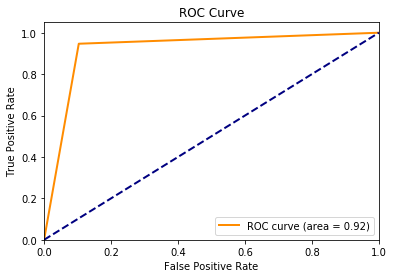

[[39  3]
 [ 8 63]]
--------------------------------------------------------
N_estimators =  50 max_depth =  7 learning_rate =  0.01
0.9384194053208137
0.9227395151981531
0.9395696083324907
0.9381646006545281
0.91738246013549


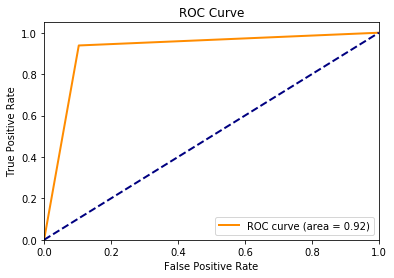

[[40  2]
 [ 8 63]]
--------------------------------------------------------
N_estimators =  100 max_depth =  3 learning_rate =  0.01
0.9692097026604068
0.9438553289726818
0.9436673448005528
0.9559496672942247
0.9352139321718426


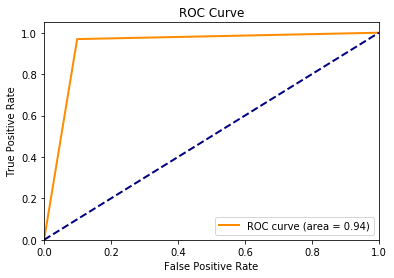

[[39  3]
 [ 3 68]]
--------------------------------------------------------
N_estimators =  100 max_depth =  5 learning_rate =  0.01
0.9552034428794991
0.9368064640246248
0.9450390591566704
0.9499277846595797
0.9305363836767375


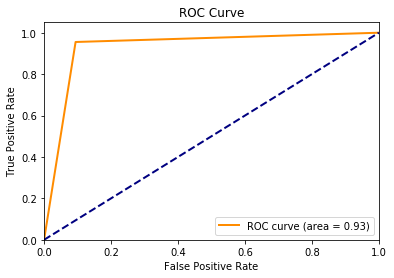

[[39  3]
 [ 4 67]]
--------------------------------------------------------
N_estimators =  100 max_depth =  7 learning_rate =  0.01
0.935641627543036
0.9262793382070027
0.9468885999989947
0.9406431065576916
0.9230810574038546


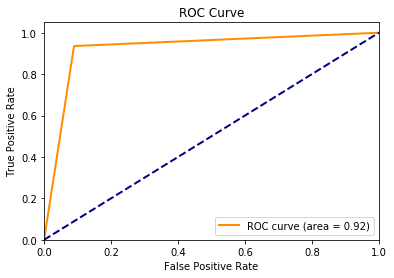

[[40  2]
 [ 8 63]]
--------------------------------------------------------
N_estimators =  200 max_depth =  3 learning_rate =  0.01
0.9692488262910798
0.9526741054251634
0.9563214641383656
0.9625138072061222
0.9470275139207336


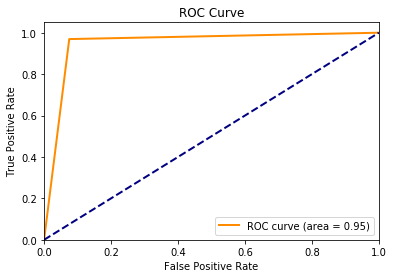

[[40  2]
 [ 2 69]]
--------------------------------------------------------
N_estimators =  200 max_depth =  5 learning_rate =  0.01
0.9607589984350546
0.9437937668333974
0.9507476585792931
0.9555395133564147
0.9380206952308164


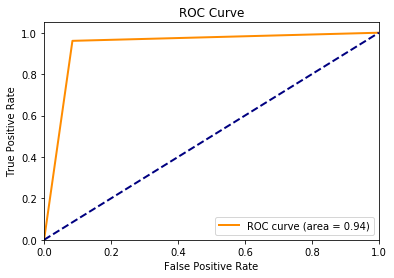

[[40  2]
 [ 4 67]]
--------------------------------------------------------
N_estimators =  200 max_depth =  7 learning_rate =  0.01
0.935641627543036
0.9280184686417853
0.9494061860782246
0.9419279435912296
0.9254066387992035


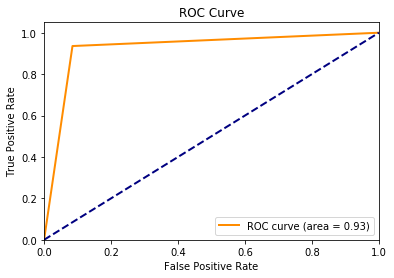

[[40  2]
 [ 8 63]]
--------------------------------------------------------


In [66]:
learning_rate = 0.1
for i in range(3):
    if(i== 1):
        learning_rate = 0.05
    elif i==2:
        learning_rate = 0.01
    n_estimators = 50
   
    while n_estimators <=200:
        max_depth = 3
        while max_depth <= 7:
            model = GradientBoostingClassifier(learning_rate=learning_rate,max_depth=max_depth,n_estimators=n_estimators)
            recalls = np.empty((1,0),dtype = float)
            acuracias = np.empty((1,0),dtype = float)
            precisions = np.empty((1,0),dtype = float)
            f1s = np.empty((1,0),dtype = float)
            aucs = np.empty((1,0),dtype = float)
            fprs = np.empty((1,0),dtype = float)
            tprs = np.empty((1,0),dtype = float)
            for idx_train, idx_test in kfold.split(X,y):
                Xtrain = X[idx_train]
                Xtest = X[idx_test]
                y_train = y[idx_train]
                y_test = y[idx_test]
                model.fit(Xtrain,y_train)
                y_pred = model.predict(Xtest)
                acuracia = metrics.accuracy_score(y_test,y_pred)
                precision = metrics.precision_score(y_test,y_pred)
                recall = metrics.recall_score(y_test, y_pred)
                f1 = metrics.f1_score(y_test, y_pred)
                recalls = np.append(recalls,recall)
                acuracias = np.append(acuracias,acuracia)
                precisions = np.append(precisions,precision)
                f1s = np.append(f1s,f1)
                auc = metrics.roc_auc_score(y_test,y_pred)
                aucs = np.append(aucs,auc)


                fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)
                fprs = np.append(fprs,fpr[1])
                tprs = np.append(tprs,tpr[1])
            roc = metrics.auc([0,np.mean(fprs),1], [0,np.mean(tprs),1])
            print("N_estimators = ",n_estimators,"max_depth = ", max_depth,"learning_rate = ",learning_rate)
            print(np.mean(recalls))
            print(np.mean(acuracias))
            print(np.mean(precisions))
            print(np.mean(f1s))
            print(np.mean(aucs))
            
            plt.figure();
            plt.plot([0,np.mean(fprs),1],[0,np.mean(tprs),1], color='darkorange',
            lw=2, label='ROC curve (area = %0.2f)' % roc)
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend(loc="lower right")
            plt.show()
            print(metrics.confusion_matrix(y_test, y_pred, labels=np.unique(y_test)))

            print("--------------------------------------------------------")
            max_depth = max_depth + 2
        n_estimators = n_estimators*2
